# Notebook for accessing GCI Alaska Data

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import butter, filtfilt

In [3]:
#define filepaths
kkfls = "F:/GitHub_files/FM_Segmentation_DAS/src/data/kkfls_2023-12-02_08.30.57_UTC.h5"
terra = "F:/GitHub_files/FM_Segmentation_DAS/src/data/terra_2023-12-02_08.30.56_UTC.h5"
test = "F:/GitHub_files/FM_Segmentation_DAS/src/data/decimator2_2023-12-30_22.35.57_UTC.h5"


In [4]:
# Load the data
kkfls_load= h5py.File (kkfls, 'r')
kkfls_data = kkfls_load['Acquisition/Raw[0]/RawData'][:] 
kkfls_time = kkfls_load['Acquisition/Raw[0]/RawDataTime'][:]
kkfls_count = kkfls_load['Acquisition/Raw[0]/RawDataSampleCount'][:] 

In [5]:
# Load the data for terra
terra_load = h5py.File(terra, 'r')
terra_data = terra_load['Acquisition/Raw[0]/RawData'][:] 
terra_time = terra_load['Acquisition/Raw[0]/RawDataTime'][:]
terra_count = terra_load['Acquisition/Raw[0]/RawDataSampleCount'][:]

In [6]:
# Load the data for test
test_load = h5py.File(test, 'r')
test_data = test_load['Acquisition/Raw[0]/RawData'][:] 
test_time = test_load['Acquisition/Raw[0]/RawDataTime'][:]
test_count = test_load['Acquisition/Raw[0]/RawDataSampleCount'][:]

In [7]:
#display the kkfls_load and terra_load data
print(kkfls_load.keys())
print(terra_load.keys())
print(kkfls_data.shape)
print(terra_data.shape)
print(kkfls_time.shape)
print(terra_time.shape)
print(kkfls_count.shape)
print(terra_count.shape)

#add test
print(test_load.keys())
print(test_data.shape)
print(test_time.shape)


<KeysViewHDF5 ['Acquisition']>
<KeysViewHDF5 ['Acquisition']>
(1500, 8530)
(1500, 8530)
(1500,)
(1500,)
(1500,)
(1500,)
<KeysViewHDF5 ['Acquisition']>
(1500, 8530)
(1500,)


In [8]:
print(kkfls_load["Acquisition"].attrs)

<Attributes of HDF5 object at 1737289315120>


In [9]:
sampling_rate = 25 # hz

def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y

# Apply high-pass filter to the data
cutoff_frequency = 1  # 1 Hz
#filtered_data = highpass_filter(data, cutoff_frequency, sampling_rate)

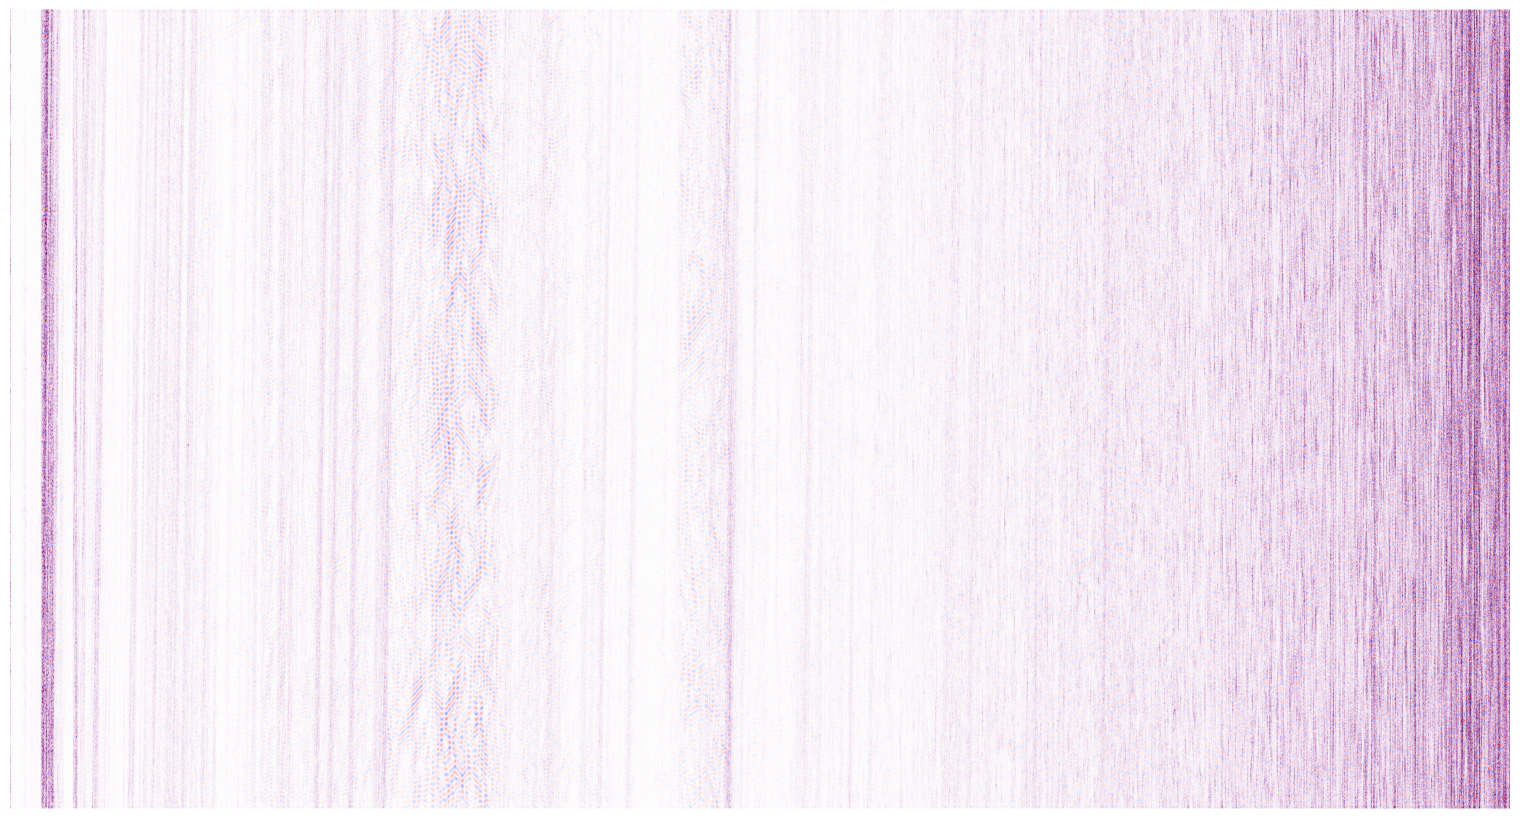

In [16]:
#plot the kkfls data and the terra data
# Convert epoch time to seconds
kkfls_time = np.array([(x - kkfls_time[0]).astype('timedelta64[s]').astype(int) for x in kkfls_time])

# Apply high-pass filter to the data
filtered_data_kkfls = highpass_filter(kkfls_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector_kkfls = np.arange(0, kkfls_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data_kkfls = (filtered_data_kkfls - np.min(filtered_data_kkfls)) / (np.max(filtered_data_kkfls) - np.min(filtered_data_kkfls)) * 255
#Standardization (zero mean, unit variance)
array_standardized_kkfls = (filtered_data_kkfls - np.mean(filtered_data_kkfls)) / np.std(filtered_data_kkfls)

# Create a figure and axis without borders or extra padding

dmax_kkfls = np.max(np.abs(array_standardized_kkfls))

fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(array_standardized_kkfls, aspect='auto', cmap='seismic', vmin=-dmax_kkfls/10, vmax=dmax_kkfls/10, extent=[0, time_vector_kkfls[-1], kkfls_count[-1], 0])
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)


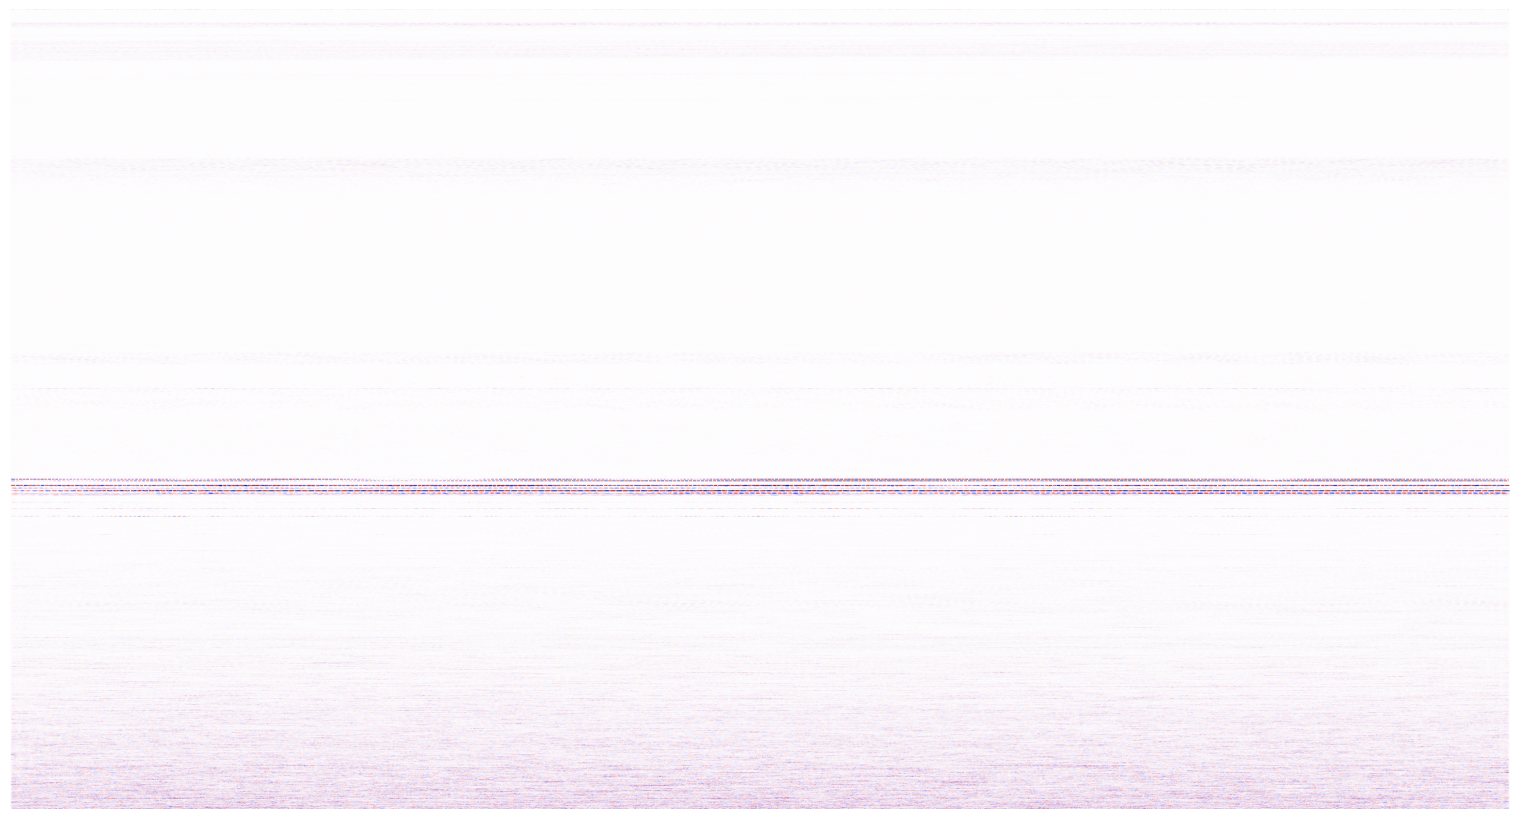

In [11]:
#plot the terra data and the terra data
# Convert epoch time to seconds
terra_time = np.array([(x - terra_time[0]).astype('timedelta64[s]').astype(int) for x in terra_time])

# Apply high-pass filter to the data
filtered_data_terra = highpass_filter(terra_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector = np.arange(0, terra_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data_terra = (filtered_data_terra - np.min(filtered_data_terra)) / (np.max(filtered_data_terra) - np.min(filtered_data_terra)) * 255
#Standardization (zero mean, unit variance)
array_standardized_terra = (filtered_data_terra - np.mean(filtered_data_terra)) / np.std(filtered_data_terra)

# Create a figure and axis without borders or extra padding

dmax_terra = np.max(np.abs(array_standardized_terra))

fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(array_standardized_terra.T, aspect='auto', cmap='seismic', vmin=-dmax_terra/10, vmax=dmax_terra/10, extent=[0, time_vector[-1], terra_count[-1], 0])
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)


In [12]:
numpy_check = "F:/GitHub_files/FM_Segmentation_DAS/src/data/numpy_files/p-wave_2023-12-30_22.35.57_UTC.npy"
numpy_check = np.load(numpy_check)
print(numpy_check.shape)

swave_test = "F:/GitHub_files/FM_Segmentation_DAS/src/data/numpy_files/s-wave_2023-12-30_22.35.57_UTC.npy"
swave_test = np.load(swave_test)
print(swave_test.shape)

one_second_p = "F:/DAS/1/p/p-wave_2023-12-30_22.35.57_UTC_1sec_filled.npy"
one_second_p = np.load(one_second_p)

one_second_s = "F:/DAS/1/s/s-wave_2023-12-30_22.35.57_UTC_1sec_filled.npy"
one_second_s = np.load(one_second_s)


six_second_p = "F:/DAS/6/p/p-wave_2023-12-30_22.35.57_UTC_6sec_filled.npy"
six_second_p = np.load(six_second_p)

six_second_s = "F:/DAS/6/s/s-wave_2023-12-30_22.35.57_UTC_6sec_filled.npy"
six_second_s = np.load(six_second_s)

(1500, 8530)
(1500, 8530)


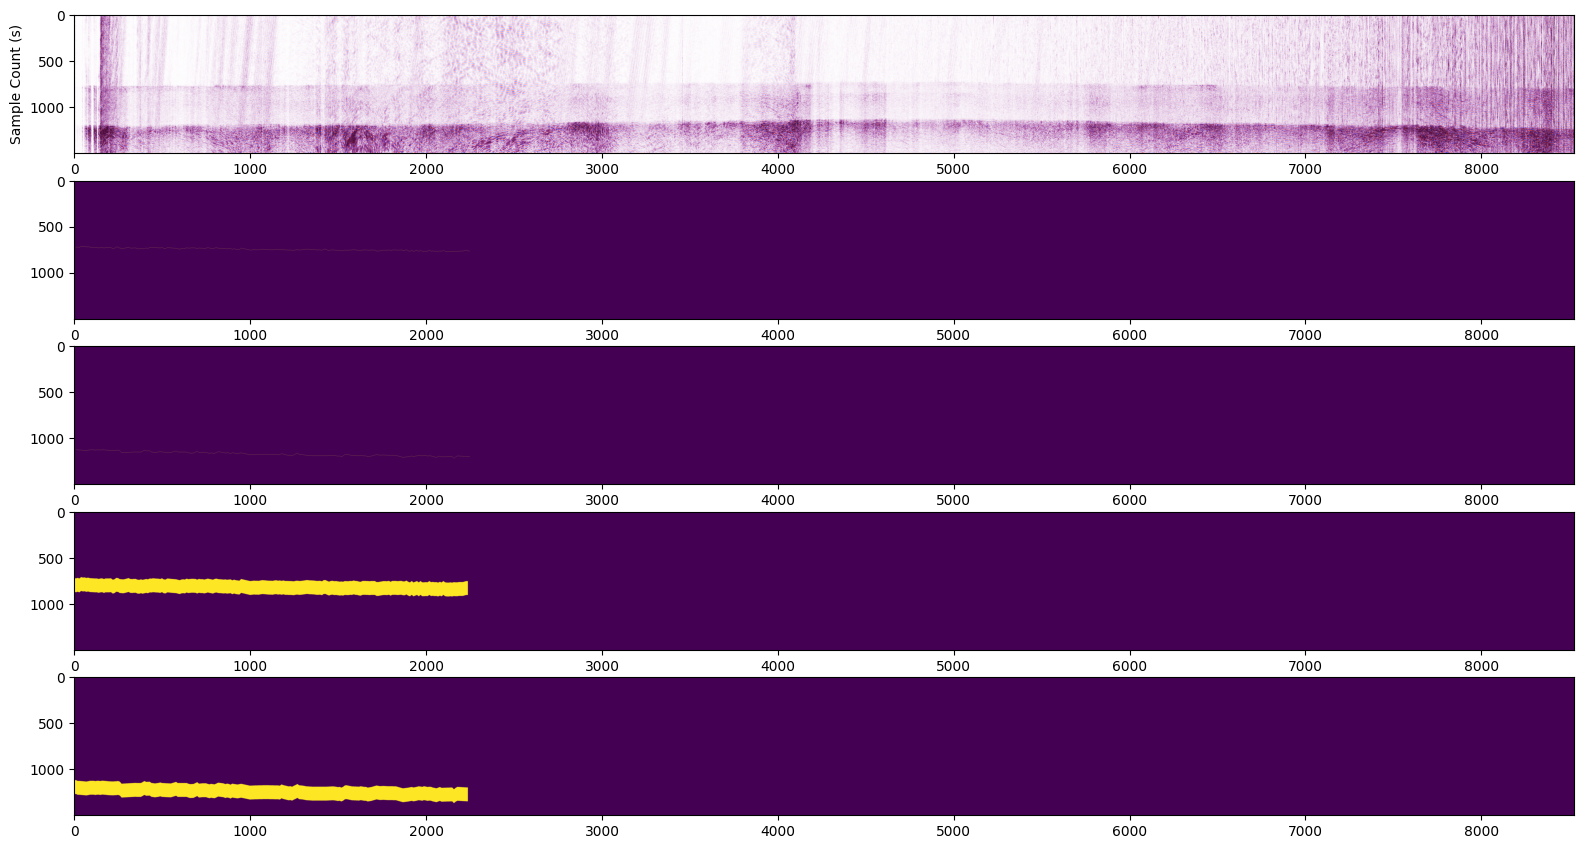

In [17]:
#plot the test data and the test data
# Convert epoch time to seconds
test_time = np.array([(x - test_time[0]).astype('timedelta64[s]').astype(int) for x in test_time])

# Apply high-pass filter to the data
filtered_data_test = highpass_filter(test_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector = np.arange(0, test_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data_test = (filtered_data_test - np.min(filtered_data_test)) / (np.max(filtered_data_test) - np.min(filtered_data_test)) * 255
#Standardization (zero mean, unit variance)
array_standardized_test = (filtered_data_test - np.mean(filtered_data_test)) / np.std(filtered_data_test)

# Create a figure and axis without borders or extra padding

dmax_test = np.max(np.abs(array_standardized_test))

fig, axes = plt.subplots(5,1,figsize=(15, 8))
axes[0].imshow(array_standardized_test, aspect='auto', cmap='seismic', vmin=-dmax_test/10, vmax=dmax_test/10)
#ax.imshow(numpy_check)
#ax.set_axis_off()
axes[0].set_ylabel('Sample Count (s)')
axes[0].set_xlabel("Channel #")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

axes[1].imshow(numpy_check, aspect='auto')
axes[2].imshow(swave_test, aspect='auto')
axes[3].imshow(six_second_p, aspect='auto')
axes[4].imshow(six_second_s, aspect='auto')


Text(0.5, -29.27777777777778, 'Channel #')

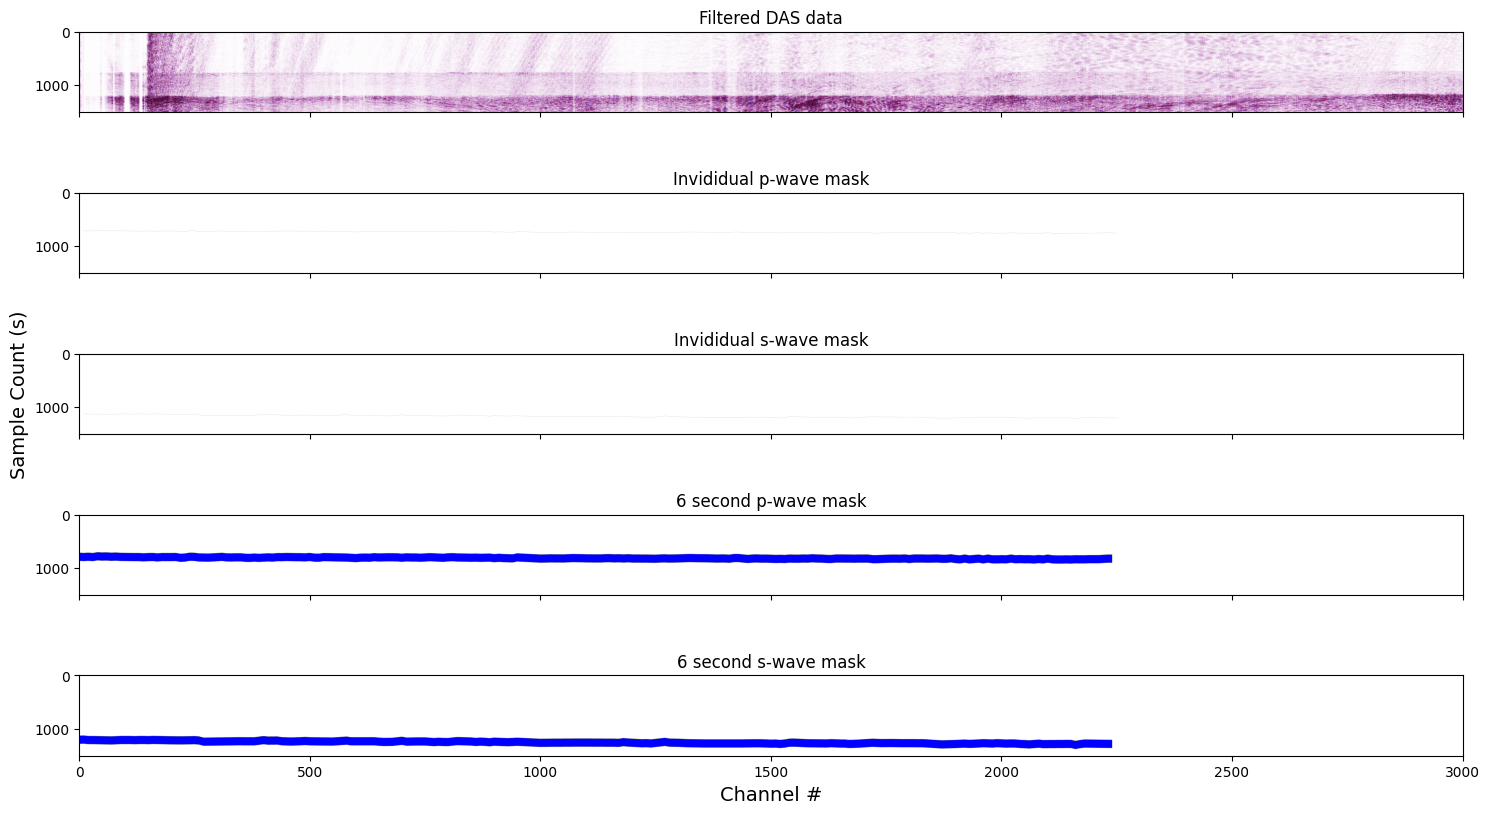

In [14]:

#plot the test data and the test data
# Convert epoch time to seconds
test_time = np.array([(x - test_time[0]).astype('timedelta64[s]').astype(int) for x in test_time])

# Apply high-pass filter to the data
filtered_data = highpass_filter(test_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector = np.arange(0, test_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data = (filtered_data - np.min(filtered_data)) / (np.max(filtered_data) - np.min(filtered_data)) * 255
#Standardization (zero mean, unit variance)
array_standardized = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Create a figure and axis without borders or extra padding

dmax = np.max(np.abs(array_standardized))

fig, axes = plt.subplots(5,1,figsize=(15, 8))
axes[0].imshow(array_standardized, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
#ax.imshow(numpy_check)
#ax.set_axis_off()
axes[2].set_ylabel('Sample Count (s)', fontsize = 14)
axes[0].set_xlabel("Channel #")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

cmap = mcolors.ListedColormap(['none', 'blue'])

axes[1].imshow(numpy_check, cmap=cmap, aspect='auto')
axes[2].imshow(swave_test, cmap=cmap, aspect='auto')
axes[3].imshow(six_second_p, cmap=cmap, aspect='auto')
axes[4].imshow(six_second_s, cmap=cmap, aspect='auto')

#set the dims of all xaxis 
axes[0].set_xlim(0, 3000)
axes[1].set_xlim(0, 3000)
axes[2].set_xlim(0, 3000)
axes[3].set_xlim(0, 3000)
axes[4].set_xlim(0, 3000)

axes[0].set_title("Filtered DAS data")
axes[1].set_title("Invididual p-wave mask")
axes[2].set_title("Invididual s-wave mask")
axes[3].set_title("6 second p-wave mask")
axes[4].set_title("6 second s-wave mask")


plt.tight_layout()

#make them share the same x axis

for ax in axes:
    ax.label_outer()  # Hide inner labels  # Set y-axis label for all subplots
    ax.grid(False)  # Disable grid lines

axes[4].set_xlabel('Channel #', fontsize = 14)  # Set x-axis label for the last subplot

Text(0.5, 0.98, '2023-12-30_22.35.57 - Filtered DAS data with variable masks in time')

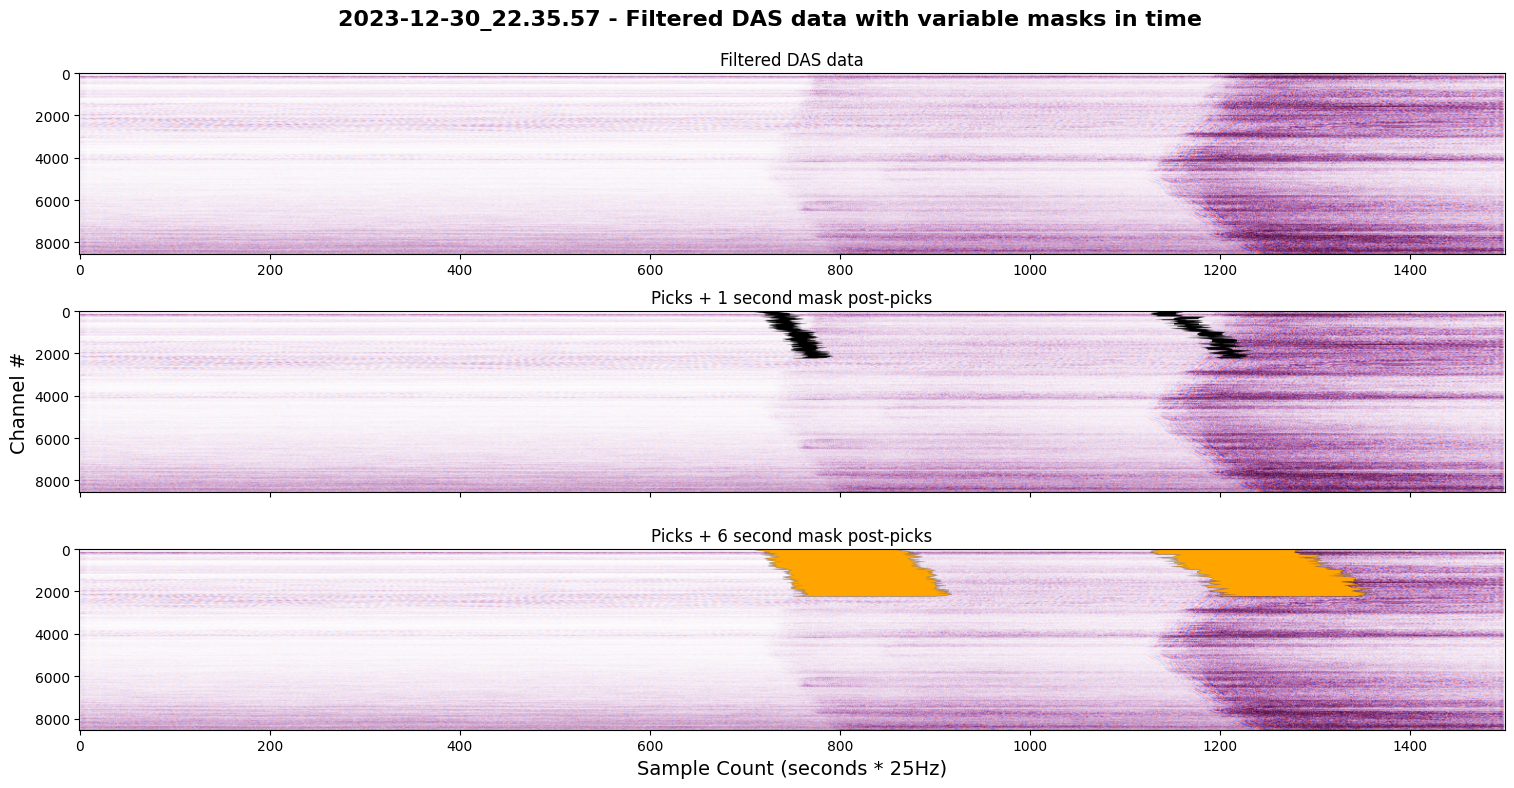

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

ax[0].imshow(array_standardized_test.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
ax[0].set_title("Filtered DAS data")


ax[1].imshow(array_standardized_test.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
#ax.imshow(numpy_check)
#ax.set_axis_off()
#ax[1].set_ylabel('Sample Count (s)', fontsize=14)
#ax[1].set_ylabel("Channel #")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

cmap = mcolors.ListedColormap(['none', 'black'])

ax[1].imshow(one_second_p.T, cmap=cmap, aspect='auto')
ax[1].imshow(one_second_s.T, cmap=cmap, aspect='auto')

# Set the dims of all x-axis
#ax[1].set_ylim(0, 3000)

ax[1].set_title("Picks + 1 second mask post-picks")

plt.tight_layout()

# Make them share the same x-axis
ax[1].label_outer()  # Hide inner labels
ax[1].grid(False)  # Disable grid lines

#ax[1].set_xlabel('Channel #', fontsize=14)  # Set x-axis label for the subplot

# subplot 2

ax[2].imshow(array_standardized_test.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
#ax.imshow(numpy_check)
#ax.set_axis_off()
ax[2].set_xlabel('Sample Count (seconds * 25Hz)', fontsize=14)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

cmap = mcolors.ListedColormap(['none', 'orange'])


ax[2].imshow(six_second_p.T, cmap=cmap, aspect='auto')
ax[2].imshow(six_second_s.T, cmap=cmap, aspect='auto')

# Set the dims of all x-axis
#ax[1].set_ylim(0, 2300)
#ax[0].set_ylim(0, 2300)

#ax[2].set_ylim(0, 2300)

ax[2].set_title("Picks + 6 second mask post-picks")

plt.tight_layout()

# Make them share the same x-axis
ax[2].label_outer()  # Hide inner labels
ax[2].grid(False)  # Disable grid lines

ax[1].set_ylabel('Channel #', fontsize=14)  # Set x-axis label for the subplot
plt.subplots_adjust(top=.9)
plt.suptitle("2023-12-30_22.35.57 - Filtered DAS data with variable masks in time", fontsize=16, fontweight='bold')

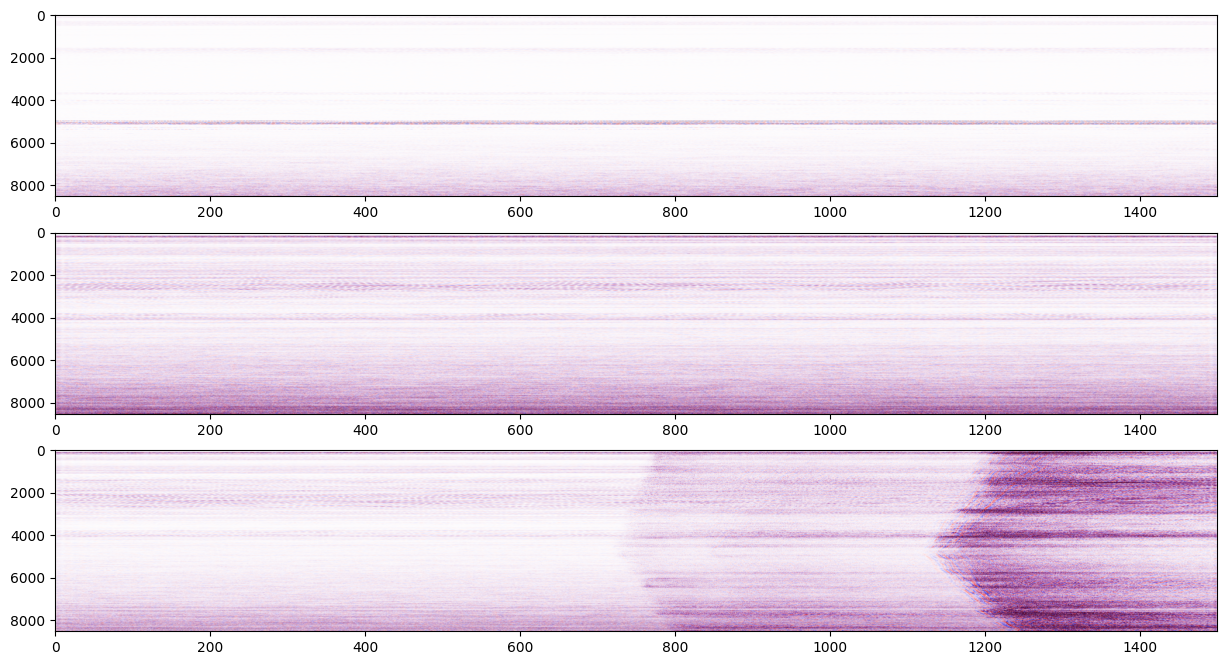

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

ax[0].imshow(array_standardized_terra.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
ax[1].imshow(array_standardized_kkfls.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)
ax[2].imshow(array_standardized_test.T, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10)

# Above appears reversed - Ask Marine